# Visualization

## Imports

### Packages

In [ ]:
import os
import json
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.ticker import ScalarFormatter, LogLocator, FuncFormatter, MaxNLocator

### Data

In [5]:
# log_name = 'LoanApp_SingleRole'
log_name = 'LoanApp_SingleRole_fixDuration' 
# log_name = 'ten_activities'


if log_name == 'LoanApp_SingleRole_fixDuration':
    # experiment_name = '20251022_143352'
    # experiment_name = '20251023_224629_leadTime'
    # experiment_name = '20251024_173944'
    # experiment_name = '20251024_180310_cycletT_1rep'
    # experiment_name = '20251024_181734_cycleT_3rep'
    # experiment_name = '20251024_182300'
    # experiment_name = '20251024_183331'
    # experiment_name = '20251025_155431'
    # experiment_name = '20251027_153743'
    # experiment_name = '20251027_172750'
    # experiment_name = '20251027_222928'
    experiment_name = '20251027_222928_aD0.3_30reps'




if log_name == 'ten_activities' :
    # experiment_name = '20251022_175326'
    # experiment_name = '20251022_180007'
    # experiment_name = '20251022_180313_varyingTaskDur'
    # experiment_name = '20251022_183441_moreIncreasedTaskDur'
    # experiment_name = '20251023_201538'
    experiment_name = '20251023_213843' # idle cycle time aka lead time

In [8]:

# results_df_path = os.path.join('data', log_name, 'output', 'simulation_log_backup.csv')
# results_df_path = os.path.join('data', log_name, 'simulation_log.csv')
# results_df_path = os.path.join('data', log_name, 'output', 'simulation_log_combined.csv')
# results_df_path = os.path.join('data', log_name, 'output', 'simulation_log_run2.csv')



results_df_path = os.path.join('data', log_name, 'output', experiment_name, 'simulation_log.csv')
# os.path.join('data', log_name, 'output', 'simulation_log.csv')
results_df = pd.read_csv(results_df_path)

In [9]:
# Create output directories for figures
output_dir = os.path.join('data', log_name, 'output', experiment_name)
output_figures = os.path.join(output_dir, 'figures')
os.makedirs(output_figures, exist_ok=True)


In [10]:
# Drop the columns 'ppi_value' and 'distance' if they exist in the DataFrame
columns_to_drop = ['ppi_value', 'distance']
results_df = results_df.drop(columns=[col for col in columns_to_drop if col in results_df.columns])

# rename the column

In [11]:
# Version connectivity of naming
results_df = results_df.rename(columns={'target_ppi_mean': 'target_ppi_val'})

# if the column status is present, replace True with "in" and False with "out"
if 'status' in results_df.columns:
    results_df['status'] = results_df['status'].replace({True: 'in', False: 'out'})

In [12]:

params_path = os.path.join('data', log_name, 'output', experiment_name, 'params.json')
with open(params_path, 'r') as f:
    params = json.load(f) 

In [13]:
# process_name = 'LoanApp_SingleRole'
# target_ppi = 'cycle_time'
# ppi_range_factor = 0.1
# dt = datetime.datetime(2025, 6, 23, 9, 0, tzinfo=datetime.timezone.utc)
# cases_to_simulate = 500
# simulation_tool = 'simod'
# discover_bps_model = False
# nr_simulations_per_scenario = 10

# base_path = os.path.join('data', process_name)
# dt_str = dt.strftime("%Y-%m-%dT%H:%M:%SZ")

# params = {
#     'process_name': process_name,
#     'base_path': base_path,
#     'target_ppi': target_ppi,
#     'ppi_range_factor': ppi_range_factor,
#     'cases_to_simulate': cases_to_simulate,
#     'starting_at':dt_str,
#     'simulation_tool': simulation_tool,
#     'nr_simulations_per_scenario': nr_simulations_per_scenario,
#     'target_range': [13754.0, 16810.0]
# }

# params['params_to_change'] = {
#     'arriaval_distr_mean': {'type': 'cont', 'values': [300, 14400]}, 
#     'resource_count_UnifiedResourceProfile': {'type': 'disc', 'values': [2, 26]}
#     }

In [14]:
results_df.head()

,algorithm,simulation_id,timestamp,target_range,status,target_ppi,target_ppi_val,target_ppi_list,arriaval_distr_mean,resource_count_UnifiedResourceProfile
0,orig_run,0,2025-10-27T21:29:41.079104Z,"[22870.0, 42473.0]",in,cycle_time,3.267173e+04,"[32379.47947947948, 33200.3003003003, 32792.48...",1800.0,19
1,grid_search,1,2025-10-27T21:29:54.823325Z,"[22870.0, 42473.0]",out,cycle_time,4.535717e+07,"[45292426.6, 45420430.3, 44875584.0, 45547285....",300.0,2
2,grid_search,2,2025-10-27T21:30:08.279304Z,"[22870.0, 42473.0]",out,cycle_time,2.994241e+07,"[30144529.2, 30008499.9, 29984179.8, 29913653....",300.0,3
3,grid_search,3,2025-10-27T21:30:21.771201Z,"[22870.0, 42473.0]",out,cycle_time,2.226348e+07,"[22150672.1, 22285285.7, 22276860.0, 22120845....",300.0,4
4,grid_search,4,2025-10-27T21:30:35.310572Z,"[22870.0, 42473.0]",out,cycle_time,1.760814e+07,"[17609700.9, 17659087.0, 17730293.3, 17508599....",300.0,5


In [15]:
params

{'base_path': 'data/LoanApp_SingleRole_fixDuration',
 'bpmn_path': 'data/LoanApp_SingleRole_fixDuration/LoanApp_SingleRole_fixDuration.bpmn',
 'cases_to_simulate': 1000,
 'confidence': 0.9,
 'decimals': 2,
 'execute_strategy': ['grid_search', 'quadtree'],
 'experiment_output_dir': 'data/LoanApp_SingleRole_fixDuration/output/20251027_222928',
 'in_out_criteria': 'confidence',
 'json_path': 'data/LoanApp_SingleRole_fixDuration/LoanApp_SingleRole_fixDuration.json',
 'json_path_temp': 'data/LoanApp_SingleRole_fixDuration/LoanApp_SingleRole_fixDuration_temp.json',
 'nr_simulations_per_scenario': 30,
 'orig_target_ppi_val': 32671.731446351645,
 'output_params_path': 'data/LoanApp_SingleRole_fixDuration/output/20251027_222928/params.json',
 'params_to_change': {'arriaval_distr_mean': {'type': 'cont',
   'values': [300, 14400]},
  'resource_count_UnifiedResourceProfile': {'type': 'disc',
   'values': [2, 25]}},
 'ppi_range_factor': 0.3,
 'print_intermediate_results': True,
 'process_name': 'Lo

In [16]:
params['viz'] = {
    # 'x_param': 'arriaval_distr_mean',
    # 'y_param': 'resource_count_UnifiedResourceProfile',
    # 'z_col': params['target_ppi']
    'output_figures_path': output_figures,
    'figure_extensions': ['.png', '.eps']
}

### Original Log data

In [845]:
# path_to_orig_log = os.path.join('data', log_name, 'LoanApp_SingleRole_fixDuration_sim.csv')
path_to_orig_log = os.path.join('data', log_name, f'{log_name}.csv')
original_log_df = pd.read_csv(path_to_orig_log)

## Plotting functions

### 2D

#### Overall

In [17]:
def plot_target_ppi(df, params, algorithm):
    """
    Plots the target PPI values across simulations with the target range bounds.

    Args:
        df (pd.DataFrame): The DataFrame containing simulation results, including "target_ppi_val".
        params (dict): A dictionary containing simulation parameters, including "target_range".
        algorithm (str): The name of the algorithm used for the simulation.

    Returns:
        None
    """
    # filter dataframe for algorithm
    df = df[df['algorithm'] == algorithm]

    # Define the target range bounds
    target_range_lower = params['target_range'][0]
    target_range_upper = params['target_range'][1]

    # Plot the target PPI values
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df["target_ppi_val"], marker='o', linestyle='-', color='b', label='Target PPI Value')

    # Add horizontal lines for the target range
    plt.axhline(y=target_range_lower, color='g', linestyle='--', label=f'Lower Bound ({target_range_lower})')
    plt.axhline(y=target_range_upper, color='r', linestyle='--', label=f'Upper Bound ({target_range_upper})')

    # Add labels and title
    plt.xlabel("Simulation Index")
    plt.ylabel("Target PPI Value")
    plt.title(f"Target PPI Value Across Simulations ({algorithm})")
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()

#### Per parameter

In [18]:
def plot_scatter_for_all_parameters(df, params, algorithm, target_ppi_col="target_ppi_val", use_log_scale=False):
    """
    Generates scatter plots for each parameter in the DataFrame against the target PPI value.

    Args:
        df (pd.DataFrame): The DataFrame containing simulation results.
        params (dict): A dictionary containing simulation parameters, including "target_range".
        algorithm (str): The name of the algorithm used for the simulation.
        target_ppi_col (str): The column name for the target PPI value.
        use_log_scale (bool): Whether to use a logarithmic scale for the y-axis.

    Returns:
        None
    """

    # filter dataframe for algorithm
    df = df[df['algorithm'] == algorithm]

    # Extract all parameter columns from params_to_change
    parameter_columns = list(params['params_to_change'].keys())

    # Iterate over each parameter column
    for param in parameter_columns:
        plt.figure(figsize=(10, 6))
        
        # Add horizontal lines for the target range if provided
        target_range = params.get('target_range', None)
        if target_range:
            plt.axhline(y=target_range[0], color='g', linestyle='--', label=f'Lower Bound ({target_range[0]})')
            plt.axhline(y=target_range[1], color='r', linestyle='--', label=f'Upper Bound ({target_range[1]})')
        
        # Set y-axis to logarithmic scale if use_log_scale is True
        if use_log_scale:
            plt.yscale('log')

        # Scatter plot for the current parameter vs. target PPI
        plt.scatter(df[param], df[target_ppi_col], color='b', alpha=0.7)
        plt.xlabel(param.replace("_", " ").capitalize())
        plt.ylabel("Target PPI Value")
        plt.title(f"Relationship Between {param.replace('_', ' ').capitalize()} and Target PPI ({algorithm})")
        plt.legend()
        plt.grid(True)
        plt.show()

#### params x param for several algorithms

In [140]:
import matplotlib.pyplot as plt
import os

def plot_param_relationships(results_df, params_to_change, algorithms, params):
    """
    Plots the relationship between two parameters for multiple algorithms, highlighting points in and out of the target range.

    Args:
        results_df (pd.DataFrame): The DataFrame containing simulation results.
        params_to_change (list): A list of two parameter names to plot on the x and y axes.
        algorithms (list): A list of algorithm names to differentiate results.
        params (dict): A dictionary containing simulation parameters, including "target_range".
        output_figures (str): Path to save the output figure.

    Returns:
        None
    """

    # filter the algorithms list for those present in the results_df
    algorithms = [alg for alg in algorithms if alg in results_df['algorithm'].unique()]

    target_range = params['target_range']

    if len(params_to_change) != 2:
        raise ValueError("params_to_change must contain exactly two parameters.")

    x_param, y_param = params_to_change

    # Define colors for remaining algorithms
    colors = ['blue', 'purple', 'black']
    color_map = {alg: colors[i % len(colors)] for i, alg in enumerate(algorithms) if alg not in ["grid_search", "orig_run"]}

    plt.figure(figsize=(10, 8))

    # Plot "orig_run" first if it exists
    if "orig_run" in algorithms:
        orig_run_results = results_df[results_df['algorithm'] == "orig_run"]
        plt.scatter(
            orig_run_results[x_param],
            orig_run_results[y_param],
            color='darkblue',
            s=100,  # Larger scatter points
            label="orig_run",
            alpha=0.9
        )

    # Plot "grid_search" next
    if "grid_search" in algorithms:
        grid_search_results = results_df[results_df['algorithm'] == "grid_search"]

        # Separate points in and out of the target range
        in_range = grid_search_results[
            (grid_search_results['target_ppi_val'] >= target_range[0]) &
            (grid_search_results['target_ppi_val'] <= target_range[1])
        ]
        out_of_range = grid_search_results[
            (grid_search_results['target_ppi_val'] < target_range[0]) |
            (grid_search_results['target_ppi_val'] > target_range[1])
        ]

        # Plot in-range points in green
        plt.scatter(
            in_range[x_param],
            in_range[y_param],
            color='green',
            label="grid_search (In Range)",
            alpha=0.7
        )

        # Plot out-of-range points in red
        plt.scatter(
            out_of_range[x_param],
            out_of_range[y_param],
            color='red',
            label="grid_search (Out of Range)",
            alpha=0.7
        )

    # Plot remaining algorithms
    for algorithm in algorithms:
        if algorithm not in ["grid_search", "orig_run"]:
            algo_results = results_df[results_df['algorithm'] == algorithm]

            # Separate points in and out of the target range
            in_range = algo_results[
                (algo_results['target_ppi_val'] >= target_range[0]) &
                (algo_results['target_ppi_val'] <= target_range[1])
            ]
            out_of_range = algo_results[
                (algo_results['target_ppi_val'] < target_range[0]) |
                (algo_results['target_ppi_val'] > target_range[1])
            ]

            # Plot in-range points
            plt.scatter(
                in_range[x_param],
                in_range[y_param],
                color=color_map[algorithm],
                # label=f"{algorithm} (In Range)",
                alpha=0.7,
                marker = 'x',
                s=80
            )

            # Plot out-of-range points
            plt.scatter(
                out_of_range[x_param],
                out_of_range[y_param],
                color=color_map[algorithm],
                edgecolor='black',
                label=f"{algorithm}",
                alpha=0.7,
                marker = 'x',
                s=80
            )

    # Add labels, legend, and title
    plt.xlabel(x_param.replace("_", " ").capitalize())
    plt.ylabel(y_param.replace("_", " ").capitalize())
    plt.title("Parameter Relationships Across Algorithms")
    plt.legend()
    plt.grid(True)

    

    # Save the plot
    fig_name = f'Scatter_{x_param}_vs_{y_param}_{algorithms}'
    for extension in params['viz']['figure_extensions']:
        plt.savefig(os.path.join(params['viz']['output_figures_path'], fig_name + extension))

    plt.show()

#### Top view

### 3D

In [ ]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import numpy as np
# from matplotlib.ticker import ScalarFormatter

# def plot_3d_results_with_target_range(results_df, algorithm, x_col, z_col, y_col, target_range, y_max_value='max', use_log_scale=False, draw_plane=False):
#     """
#     Plots a 3D graph with x, z as the independent variables and y as the dependent variable,
#     including target range as planes or color coding. Optionally, draw a plane connecting the scattered dots.

#     Args:
#         results_df (pd.DataFrame): The DataFrame containing the simulation results.
#         x_col (str): The column name for the x-axis (e.g., 'arriaval_distr_mean').
#         z_col (str): The column name for the z-axis (e.g., 'resource_UnifiedResourceProfile').
#         y_col (str): The column name for the y-axis (e.g., 'target_ppi_val').
#         target_range (tuple): A tuple (lower_bound, upper_bound) for the target PPI range.
#         use_log_scale (bool): If True, the y-axis will be displayed in logarithmic scale.
#         draw_plane (bool): If True, draw a plane connecting the scattered dots.
#     """

     
#     # filter dataframe for algorithm
#     results_df = results_df[results_df['algorithm'] == algorithm]

#     # Ensure the columns exist in the DataFrame
#     if x_col not in results_df.columns or z_col not in results_df.columns or y_col not in results_df.columns:
#         print(f"One or more columns ({x_col}, {z_col}, {y_col}) are not present in the DataFrame.")
#         return

#     # Drop rows with NaN values in the specified columns
#     filtered_df = results_df.dropna(subset=[x_col, z_col, y_col])

#     # Extract the x, y, z data
#     x = filtered_df[x_col].values
#     y = filtered_df[y_col].values
#     z = filtered_df[z_col].values

#     # Determine color coding based on the target range
#     lower_bound, upper_bound = target_range
#     # upper_bound = 10000000000
#     # lower_bound = 0

#     # Create a 3D plot
#     fig = plt.figure(figsize=(12, 12))
#     ax = fig.add_subplot(111, projection='3d')

#     if draw_plane:
#         # Create a plane connecting the scattered dots
#         # Use a colormap to color the plane based on whether the area is within the target range
#         color_values = np.where((y >= lower_bound) & (y <= upper_bound), 1, 0)  # 1 for within range, 0 for outside
#         cmap = plt.cm.get_cmap('RdYlGn')  # Red for outside, green for within range
#         ax.plot_trisurf(x, z, y, cmap=cmap, alpha=0.7, shade=True, antialiased=True, linewidth=0.2, edgecolor='none')
#     else:
#         # Scatter plot with color coding
#         colors = np.where((y >= lower_bound) & (y <= upper_bound), 'g', 'r')  # Green for within range, red for outside
#         scatter = ax.scatter(x, z, y, c=colors, alpha=0.8)

#     # Add planes for the target range
#     x_range = np.linspace(x.min(), x.max(), 10)
#     z_range = np.linspace(z.min(), z.max(), 10)
#     X, Z = np.meshgrid(x_range, z_range)

#     # Lower bound plane
#     Y_lower = np.full_like(X, lower_bound)
#     ax.plot_surface(X, Z, Y_lower, color='blue', alpha=0.3, label=f"Lower Bound ({lower_bound})")

#     # Upper bound plane
#     Y_upper = np.full_like(X, upper_bound)
#     ax.plot_surface(X, Z, Y_upper, color='orange', alpha=0.3, label=f"Upper Bound ({upper_bound})")

#     # Set axis labels
#     ax.set_xlabel(x_col.replace("_", " ").capitalize())
#     ax.set_ylabel(z_col.replace("_", " ").capitalize())
#     ax.set_zlabel(y_col.replace("_", " ").capitalize())

#     # Set the title
#     ax.set_title(f"3D Plot of {y_col} vs {x_col} and {z_col} with Target Range")

#     # Adjust the view angle
#     ax.view_init(elev=30, azim=45)  # Rotate the plot (elev=30, azim=45)

#     # Apply logarithmic scale to the y-axis if use_log_scale is True
#     y_min, y_max = y.min(), y.max()  # Dynamically calculate y-axis limits
#     if use_log_scale:
#         ax.set_zscale('log')  # Set the z-axis (y_col) to logarithmic scale

#         # Set custom ticks for better visibility, including the target range values
#         log_ticks = np.logspace(np.floor(np.log10(y_min)), np.ceil(np.log10(y_max)), num=10)
#         log_ticks = np.unique(np.append(log_ticks, [lower_bound, upper_bound]))  # Ensure target range values are included
#         ax.set_zticks(log_ticks)
#     else:
#         # Set linear scale ticks for better visibility, including the target range values
#         linear_ticks = np.linspace(y_min, y_max, num=10)
#         linear_ticks = np.unique(np.append(linear_ticks, [lower_bound, upper_bound]))  # Ensure target range values are included
#         ax.set_zticks(linear_ticks)

#     # Set the y-axis limits explicitly
#     if type(y_max_value) in [int, float]:
#         y_max = y_max_value
#     else:
#         y_max = y.max()

#     ax.set_zlim(0, y_max)
#     # ax.set_zlim(0, y_max)
#     # ax.set_zlim(0, 40000)
#     # ax.set_zlim(0, 30000)

#     # Ensure plain numbers (no scientific notation) on the y-axis
#     z_formatter = ScalarFormatter(useOffset=False, useMathText=False)
#     z_formatter.set_scientific(False)
#     ax.zaxis.set_major_formatter(z_formatter)

#     # Add a legend for the planes
#     ax.text2D(0.05, 0.95, f"Target Range: {lower_bound} to {upper_bound}", transform=ax.transAxes)

#     fig_name = f'3D_{algorithm}_yMax:{y_max_value}_{x_col}_{z_col}_vs_{y_col}'
#     for extension in params['viz']['figure_extensions']:
#         plt.savefig(os.path.join(params['viz']['output_figures_path'], fig_name + extension))

#     # Show the plot
#     plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import numpy as np
# from matplotlib.ticker import ScalarFormatter

# def plot_3d_results_with_target_range(results_df, algorithm, x_col, z_col, y_col, target_range, y_max_value='max', use_log_scale=False, draw_plane=False):
#     """
#     Plots a 3D graph with x, z as the independent variables and y as the dependent variable,
#     including target range as planes or color coding. Optionally, draw a plane connecting the scattered dots.

#     Args:
#         results_df (pd.DataFrame): The DataFrame containing the simulation results.
#         x_col (str): The column name for the x-axis (e.g., 'arrival_distr_mean').
#         z_col (str): The column name for the z-axis (e.g., 'resource_UnifiedResourceProfile').
#         y_col (str): The column name for the y-axis (e.g., 'target_ppi_val').
#         target_range (tuple): A tuple (lower_bound, upper_bound) for the target PPI range.
#         use_log_scale (bool): If True, the y-axis will be displayed in logarithmic scale.
#         draw_plane (bool): If True, draw a plane connecting the scattered dots.
#     """

#     # Filter dataframe for the specified algorithm
#     results_df = results_df[results_df['algorithm'] == algorithm]

#     # Ensure the columns exist in the DataFrame
#     if x_col not in results_df.columns or z_col not in results_df.columns or y_col not in results_df.columns:
#         print(f"One or more columns ({x_col}, {z_col}, {y_col}) are not present in the DataFrame.")
#         return

#     # Drop rows with NaN values in the specified columns
#     filtered_df = results_df.dropna(subset=[x_col, z_col, y_col])

#     # Extract the x, y, z data
#     x = filtered_df[x_col].values
#     y = filtered_df[y_col].values
#     z = filtered_df[z_col].values

#     # Determine color coding based on the target range
#     lower_bound, upper_bound = target_range

#     # Create a 3D plot
#     fig = plt.figure(figsize=(12, 8))
#     ax = fig.add_subplot(111, projection='3d')

#     if draw_plane:
#         # Create a plane connecting the scattered dots
#         color_values = np.where((y >= lower_bound) & (y <= upper_bound), 1, 0)
#         cmap = plt.cm.get_cmap('RdYlGn')
#         ax.plot_trisurf(x, z, y, cmap=cmap, alpha=0.7, shade=True, antialiased=True, linewidth=0.2, edgecolor='none')
#     else:
#         # Scatter plot with color coding
#         colors = np.where((y >= lower_bound) & (y <= upper_bound), 'g', 'r')
#         scatter = ax.scatter(x, z, y, c=colors, alpha=0.8)

#     # Add planes for the target range
#     x_range = np.linspace(x.min(), x.max(), 10)
#     z_range = np.linspace(z.min(), z.max(), 10)
#     X, Z = np.meshgrid(x_range, z_range)

#     # Lower bound plane
#     Y_lower = np.full_like(X, lower_bound)
#     ax.plot_surface(X, Z, Y_lower, color='blue', alpha=0.3, label=f"Lower Bound ({lower_bound})")

#     # Upper bound plane
#     Y_upper = np.full_like(X, upper_bound)
#     ax.plot_surface(X, Z, Y_upper, color='orange', alpha=0.3, label=f"Upper Bound ({upper_bound})")

#     # Set axis labels with improved formatting
#     ax.set_xlabel(x_col.replace("_", " ").title(), fontsize=12)
#     ax.set_ylabel(z_col.replace("_", " ").title(), fontsize=12)
#     ax.set_zlabel(y_col.replace("_", " ").title(), fontsize=12)

#     # Set the title
#     ax.set_title(f"3D Plot of {y_col.replace('_', ' ').title()} vs {x_col.replace('_', ' ').title()} and {z_col.replace('_', ' ').title()} with Target Range", fontsize=14)

#     # Adjust the view angle
#     ax.view_init(elev=30, azim=45)

#     # Apply logarithmic scale to the y-axis if use_log_scale is True
#     y_min, y_max = y.min(), y.max()
#     if use_log_scale:
#         ax.set_zscale('log')

#         # Custom tick placement for better spacing
#         log_ticks = []
#         current = 1000 ** np.floor(np.log10(y_min))  # Start at the nearest power of 10 below y_min
#         while current <= y_max:
#             log_ticks.append(current)
#             if current < 100:  # Larger gaps for smaller values
#                 current *= 100
#             elif current < 1000:  # Medium gaps for mid-range values
#                 current *= 5
#             else:  # Smaller gaps for larger values
#                 current *= 5
#         log_ticks = np.array(log_ticks)
#         log_ticks = np.unique(np.append(log_ticks, [lower_bound, upper_bound]))  # Ensure target range is included
#         ax.set_zticks(log_ticks)

#         # Set limits to avoid cramping
#         ax.set_zlim(max(y_min / 10, 1e-2), y_max * 1.2)
#     else:
#         # Set linear scale ticks for better visibility
#         linear_ticks = np.linspace(y_min, y_max, num=6)
#         linear_ticks = np.unique(np.append(linear_ticks, [lower_bound, upper_bound]))
#         ax.set_zticks(linear_ticks)

#         # Set limits explicitly
#         ax.set_zlim(0, y_max_value if isinstance(y_max_value, (int, float)) else y_max)

#     # Use ScalarFormatter for plain numbers on the y-axis
#     z_formatter = ScalarFormatter(useOffset=False, useMathText=False)
#     z_formatter.set_scientific(False)
#     ax.zaxis.set_major_formatter(z_formatter)

#     # Add a legend for the planes
#     ax.text2D(0.05, 0.95, f"Target Range: {lower_bound} to {upper_bound}", transform=ax.transAxes, fontsize=10)

#     # Save the figure
#     fig_name = f'3D_{algorithm}_yMax:{y_max_value}_{x_col}_{z_col}_vs_{y_col}'
#     for extension in params['viz']['figure_extensions']:
#         plt.savefig(os.path.join(params['viz']['output_figures_path'], fig_name + extension))

#     # Show the plot
#     plt.show()

In [ ]:


def plot_3d_results_with_target_range(results_df, algorithm, x_col, z_col, y_col,
                                      target_range, y_max_value='max',
                                      use_log_scale=False, draw_plane=False):
    """
    Plots a 3D graph with x, z as the independent variables and y as the dependent variable,
    including target range as planes or color coding. Optionally, draw a plane connecting the scattered dots.
    """

    # --- Filter dataframe ---
    results_df = results_df[results_df['algorithm'] == algorithm]
    if x_col not in results_df.columns or z_col not in results_df.columns or y_col not in results_df.columns:
        print(f"Missing required columns: {x_col}, {z_col}, or {y_col}")
        return

    filtered_df = results_df.dropna(subset=[x_col, z_col, y_col])
    x, y, z = filtered_df[x_col].values, filtered_df[y_col].values, filtered_df[z_col].values
    lower_bound, upper_bound = target_range

    # --- Figure setup ---
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    # --- Scatter or surface ---
    if draw_plane:
        cmap = plt.cm.get_cmap('RdYlGn')
        ax.plot_trisurf(x, z, y, cmap=cmap, alpha=0.7, shade=True, antialiased=True)
    else:
        colors = np.where((y >= lower_bound) & (y <= upper_bound), 'g', 'r')
        ax.scatter(x, z, y, c=colors, alpha=0.8)

    # --- Target range planes ---
    X, Z = np.meshgrid(np.linspace(x.min(), x.max(), 10), np.linspace(z.min(), z.max(), 10))
    ax.plot_surface(X, Z, np.full_like(X, lower_bound), color='blue', alpha=0.25)
    ax.plot_surface(X, Z, np.full_like(X, upper_bound), color='orange', alpha=0.25)

    # --- Labels and title ---
    ax.set_xlabel(x_col.replace("_", " ").title(), fontsize=12)
    ax.set_ylabel(z_col.replace("_", " ").title(), fontsize=12)
    ax.set_zlabel(y_col.replace("_", " ").title(), fontsize=12)
    
    title = f"3D Plot of {y_col} vs {x_col} and {z_col} (Target Range)"
    # ax.set_title(title, fontsize=14)
    
    ax.view_init(elev=30, azim=45)

    # --- Handle Y (Z-axis) scale ---
    y_min, y_max = y.min(), y.max()


    if use_log_scale:
        y_min = max(y_min, 1e-6)
        y_max = float(y_max)
        ax.set_zscale('log')

        # --- Determine a "nice" top tick (always >= y_max) ---
        exponent = int(np.floor(np.log10(y_max)))
        fraction = y_max / 10**exponent
        if fraction <= 1.5:
            nice_top_tick = 2 * 10**exponent
        elif fraction <= 3:
            nice_top_tick = 3 * 10**exponent
        elif fraction <= 7:
            nice_top_tick = 5 * 10**exponent
        else:
            nice_top_tick = 10 * 10**exponent
        if nice_top_tick < y_max:
            nice_top_tick = 10**(exponent + 1)

        # --- Generate candidate ticks (log spacing) ---
        min_exp = 0
        max_exp = int(np.floor(np.log10(nice_top_tick)))
        candidate_ticks = [10 ** e for e in range(min_exp, max_exp + 1)]

        # --- Apply gap factor to reduce clutter ---
        gap_factor = 10
        major_ticks = []
        last_tick = None
        for t in candidate_ticks:
            if last_tick is None or t / last_tick >= gap_factor:
                major_ticks.append(t)
                last_tick = t

        # --- Ensure top tick is included ---
        if nice_top_tick not in major_ticks:
            major_ticks.append(nice_top_tick)

        # --- Replace first half + 1 with zero ---
        n = len(major_ticks)
        num_to_replace = n // 2 + 2
        for i in range(num_to_replace):
            major_ticks[i] = 0.0

        # --- Deduplicate and ensure single zero tick ---
        major_ticks = sorted(list(set(major_ticks)))
        if major_ticks.count(0.0) > 1:
            major_ticks = [0.0] + [t for t in major_ticks if t != 0.0]

        # --- Apply ticks and limits ---
        ax.set_zticks(major_ticks)
        ax.set_zlim(bottom=0.0, top=nice_top_tick)

        # --- Label formatting ---
        def pretty_label(val):
            if val == 0:
                return "0"
            elif val >= 1000:
                return f"{int(val):,}"
            elif val >= 1:
                return f"{val:g}"
            else:
                return f"{val:.3g}"

        ax.zaxis.set_major_formatter(FuncFormatter(lambda v, _: pretty_label(v)))

        # --- Gridlines and aesthetics ---
        ax.zaxis.set_minor_locator(LogLocator(base=10, subs=[]))
        ax.grid(which='minor', visible=False)
        ax.grid(which='major', linestyle='-', linewidth=0.4, alpha=0.3)
        ax.tick_params(axis='z', pad=10)




    else:
        # ⚙️ Linear scale
        ax.set_zlim(0, y_max_value if isinstance(y_max_value, (int, float)) else y_max)

        # Adaptive, rounded ticks
        locator = MaxNLocator(nbins=6, prune=None)
        ax.zaxis.set_major_locator(locator)

        # Clean formatting
        formatter = ScalarFormatter(useOffset=False)
        formatter.set_scientific(False)
        ax.zaxis.set_major_formatter(formatter)

    # --- Add target range annotation ---
    ax.text2D(0.05, 0.95, f"Target Range: {lower_bound}–{upper_bound}",
              transform=ax.transAxes, fontsize=10)
    
    fig.tight_layout()
    
    # Save the figure
    fig_name = f'3D_{algorithm}_yMax:{y_max_value}_{x_col}_{z_col}_vs_{y_col}'
    for extension in params['viz']['figure_extensions']:
        plt.savefig(os.path.join(params['viz']['output_figures_path'], fig_name + extension))


    plt.show()


## Short investigation

### Investigation of original log data

In [778]:
def calculate_kpi_from_log(df, kpi_name, sim_setup):
    """
    Calculate a specific KPI (e.g., 'cycle_time') from an event log DataFrame.

    Parameters
    ----------
    df : pandas.DataFrame
        The event log. Must include columns such as 'case_id', 'task_id',
        'enable_time', 'start_time', 'end_time', 'resource_id'.
    kpi_name : str
        The KPI to compute. Supported: 'cycle_time', 'processing_time',
        'waiting_time', 'idle_time', 'idle_cycle_time', 'idle_processing_time', 'cost'.
    sim_setup : SimDiffSetup
        The simulation setup object (required by LogInfo).

    Returns
    -------
    float
        The average value of the requested KPI across all traces.
    """
    from prosimos.execution_info import Trace, TaskEvent
    import pytz
    import datetime

    # --- Initialize LogInfo
    log_info = LogInfo(sim_setup)

    # Group by cases to form traces
    for case_id, case_df in df.groupby("case_id"):
        trace = Trace(case_id)
        trace.started_at = pytz.UTC.localize(case_df["start_time"].min())
        trace.completed_at = pytz.UTC.localize(case_df["end_time"].max())

        for _, row in case_df.iterrows():
            event = TaskEvent(
                case_id=case_id,
                task_id=row["task_id"],
                enable_time=row["enable_time"],
                start_time=row["start_time"],
                end_time=row["end_time"],
                resource_id=row["resource_id"]
            )
            trace.event_list.append(event)
        log_info.trace_list.append(trace)

    # --- Compute process KPIs
    process_kpi = KPIMap()
    for trace_info in log_info.trace_list:
        log_info.compute_execution_times(trace_info, process_kpi, model_type=sim_setup.model_type)

    # --- Extract requested KPI
    if not hasattr(process_kpi, kpi_name):
        raise ValueError(f"Unsupported KPI '{kpi_name}'. Available: {list(vars(process_kpi).keys())}")

    kpi_obj = getattr(process_kpi, kpi_name)
    return kpi_obj.avg


In [779]:

def calculate_kpi_from_log(df, kpi_name, agg_per_case=True):
    """
    Calculate a simple KPI (e.g. 'cycle_time', 'processing_time', 'waiting_time') 
    from a raw event log DataFrame, without needing SimDiffSetup.

    Parameters
    ----------
    df : pandas.DataFrame
        Event log containing at least:
        ['case_id', 'task_id', 'enable_time', 'start_time', 'end_time']
    kpi_name : str
        KPI to compute: 'cycle_time', 'processing_time', 'waiting_time'

    Returns
    -------
    float
        Average KPI value in seconds across all cases.
    """
    df = df.copy()

    required_cols = ['case_id', 'enable_time', 'start_time', 'end_time']
    for col in required_cols:
        if col not in df.columns:
            raise ValueError(f"Missing required column: {col}")

    # Ensure datetimes are timezone-aware (UTC)
    for c in ['enable_time', 'start_time', 'end_time']:
        df[c] = pd.to_datetime(df[c], utc=True)

    # --- compute times per event ---
    # add a column counting numbers of events per case   
    df['event_count_per_case'] = df.groupby('case_id')['activity'].transform('count')
    df["waiting_time"] = (df["start_time"] - df["enable_time"]).dt.total_seconds()
    df["processing_time"] = (df["end_time"] - df["start_time"]).dt.total_seconds()
    df["cycle_time"] = (df["end_time"] - df["enable_time"]).dt.total_seconds()

    # --- aggregate per case ---
    agg = df.groupby("case_id").agg({
        "waiting_time": "sum",
        "processing_time": "sum",
        "cycle_time": lambda x: (df.loc[x.index, "end_time"].max() - df.loc[x.index, "enable_time"].min()).total_seconds()
    }).reset_index()
        

    if kpi_name not in agg.columns:
        raise ValueError(f"Unsupported KPI '{kpi_name}'. Supported: waiting_time, processing_time, cycle_time")

    if agg_per_case:
        return agg[kpi_name].mean()
    else:
        return agg[kpi_name]


    


In [756]:
original_log_df.head()

,case_id,resource,activity,start_time,end_time
0,0,Clerk-000001,Check application form completeness,2023-02-09T08:00:00.000,2023-02-09T08:28:27.808
1,1,Clerk-000003,Check application form completeness,2023-02-09T08:30:00.000,2023-02-09T08:59:57.164
2,0,Clerk-000002,Check credit history,2023-02-09T08:28:27.808,2023-02-09T09:00:01.030
3,1,Appraiser-000002,Appraise property,2023-02-09T08:59:57.164,2023-02-09T09:00:18.122
4,2,Clerk-000005,Check application form completeness,2023-02-09T09:00:00.000,2023-02-09T09:04:40.802


In [757]:
ppis = calculate_kpi_from_log(original_log_df, "cycle_time", agg_per_case=False)
ppis.shape

ValueError: Missing required column: enable_time

In [758]:
plot_target_ppi_hist(calculate_kpi_from_log(original_log_df, "cycle_time", agg_per_case=False), log_scale=False)

ValueError: Missing required column: enable_time

/var/folders/x1/w2d1_9vs4497b2lw430zv8h40000gn/T/ipykernel_17331/978596421.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_sums = ppis.groupby(binned_ppis).sum()


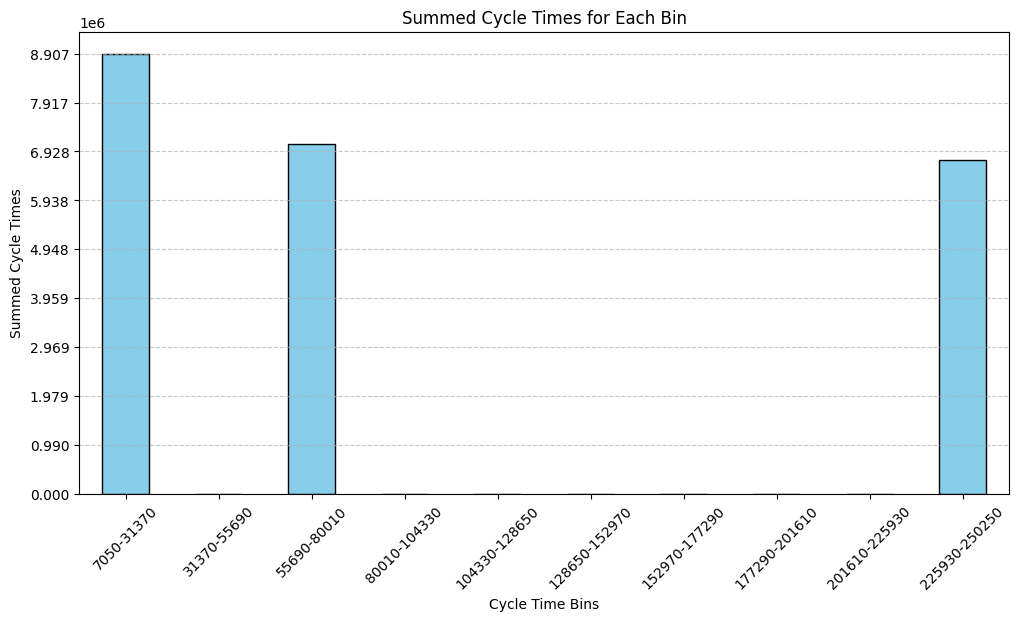

In [ ]:
# Define the number of bins
num_bins = 10

# Calculate bin edges and labels
bin_edges = np.linspace(ppis.min(), ppis.max(), num_bins + 1)
bin_labels = [f"{int(bin_edges[i])}-{int(bin_edges[i+1])}" for i in range(len(bin_edges) - 1)]

# Bin the ppis values
binned_ppis = pd.cut(ppis, bins=bin_edges, labels=bin_labels, include_lowest=True)

# Group the original ppis values by the bins and calculate the sum
binned_sums = ppis.groupby(binned_ppis).sum()

# Plot the summed cycle times for each bin
plt.figure(figsize=(12, 6))
binned_sums.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Cycle Time Bins")
plt.ylabel("Summed Cycle Times")
plt.title("Summed Cycle Times for Each Bin")
y_max = max(binned_sums)
y_ticks = [int(i) for i in np.linspace(0, y_max, num=10)]
plt.yticks(y_ticks)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
# print("Avg cycle time:", calculate_kpi_from_log(original_log_df, "cycle_time", agg_per_case=False))
# print("Avg cycle time:", calculate_kpi_from_log(original_log_df, "cycle_time", agg_per_case=False))

### Investigation of Robustness data

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933 entries, 0 to 932
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   algorithm                              933 non-null    object 
 1   simulation_id                          933 non-null    int64  
 2   timestamp                              933 non-null    object 
 3   target_range                           933 non-null    object 
 4   status                                 933 non-null    object 
 5   target_ppi                             933 non-null    object 
 6   target_ppi_val                         933 non-null    float64
 7   target_ppi_list                        933 non-null    object 
 8   arriaval_distr_mean                    933 non-null    float64
 9   resource_count_UnifiedResourceProfile  933 non-null    int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 73.0+ 

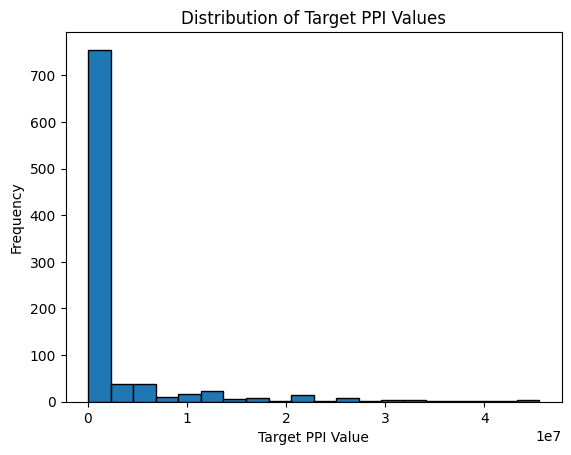

In [18]:
# Display basic information about the dataframe
print("Basic Information:")
print(results_df.info())

# Display the first few rows of the dataframe
print("\nFirst 5 Rows:")
print(results_df.head())

# Check for missing values
print("\nMissing Values:")
print(results_df.isnull().sum())

# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(results_df.describe())

# Count of unique values in the 'status' column
print("\nStatus Value Counts:")
print(results_df['status'].value_counts())

# Check the distribution of 'target_ppi_val'
plt.hist(results_df['target_ppi_val'], bins=20, edgecolor='k')
plt.title('Distribution of Target PPI Values')
plt.xlabel('Target PPI Value')
plt.ylabel('Frequency')
plt.show()

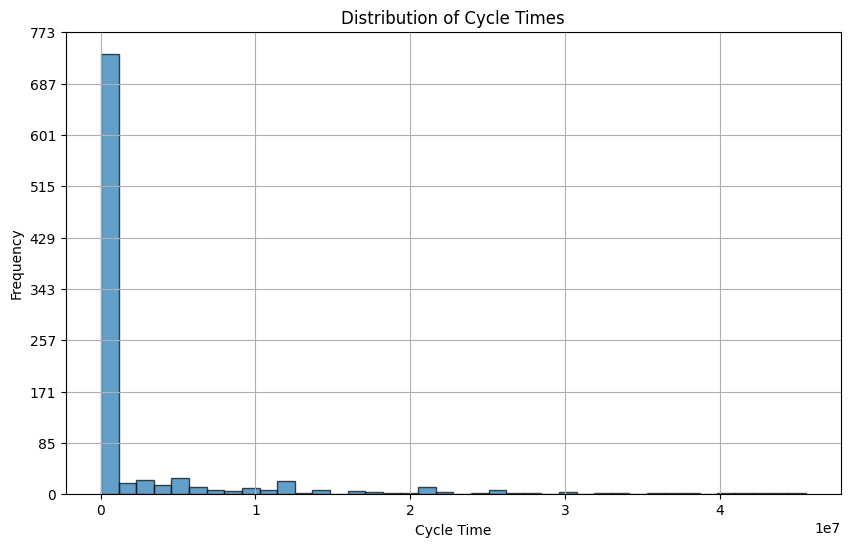

In [19]:
def plot_target_ppi_hist(ppi_values, log_scale=False):
    # Plot the distribution of cycle times with dynamically generated y-ticks
    plt.figure(figsize=(10, 6))
    plt.hist(ppi_values, bins=40, edgecolor='k', alpha=0.7)
    plt.title('Distribution of Cycle Times')
    plt.xlabel('Cycle Time')
    plt.ylabel('Frequency')

    # Generate dynamic y-ticks based on the range of values
    y_min, y_max = plt.ylim()
    if log_scale:
        plt.yscale('log')
        y_ticks = [10**i for i in range(int(np.floor(np.log10(y_min))), int(np.ceil(np.log10(y_max))) + 1)]
    else:
        y_ticks = [int(i) for i in np.linspace(0, y_max, num=10)]
    plt.grid(True)
    
    plt.yticks(y_ticks, [f"{tick:,}" for tick in y_ticks])  # Format ticks with commas

    plt.show()

plot_target_ppi_hist(results_df['target_ppi_val'])

In [20]:
results_df['target_ppi_val']

0      3.281185e+04
1      4.529988e+07
2      3.006737e+07
3      2.233862e+07
4      1.756652e+07
           ...     
928    3.195184e+04
929    3.225782e+04
930    3.196738e+04
931    3.233714e+04
932    3.187781e+04
Name: target_ppi_val, Length: 933, dtype: float64

## Plotting

#### Set up

In [21]:
algorithms = results_df['algorithm'].unique()
print("Algorithms:", algorithms)

Algorithms: ['orig_run' 'grid_search' 'quadtree']


In [22]:
algorithms
params_to_change_keys = list(params['params_to_change'].keys())

In [23]:
params_to_change_keys = params['params_to_change'].keys()
print("Keys in params_to_change:", list(params_to_change_keys))

Keys in params_to_change: ['arriaval_distr_mean', 'resource_count_UnifiedResourceProfile']


### 2D

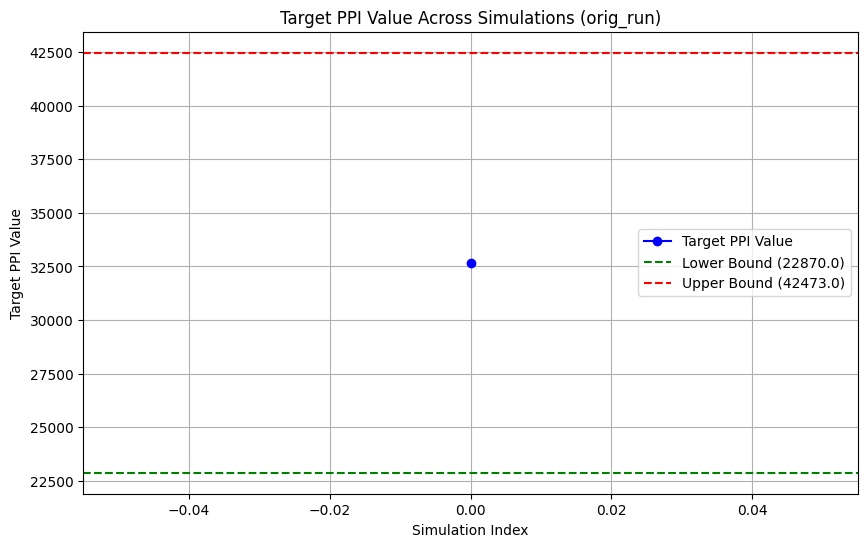

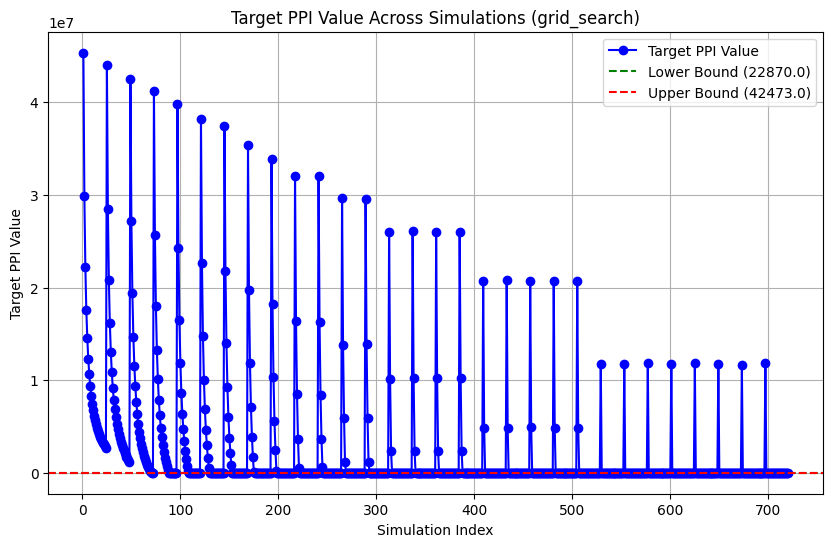

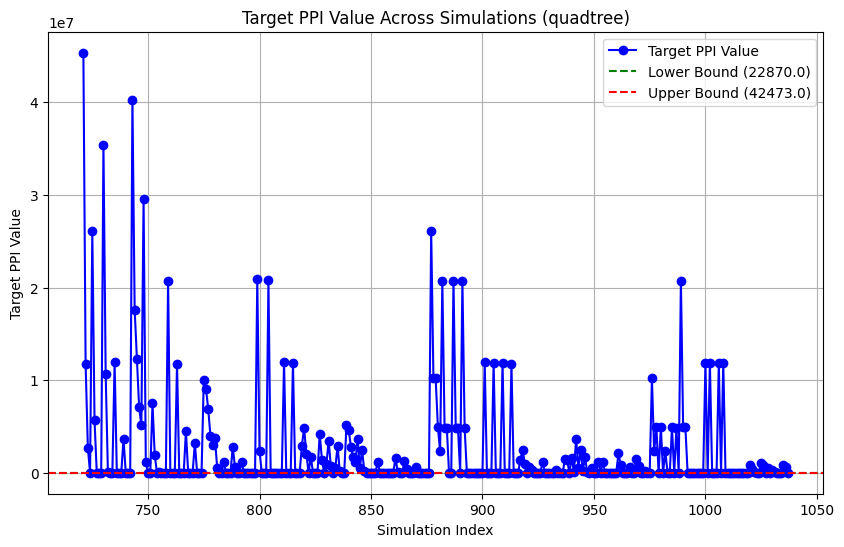

In [133]:
for algorithm in algorithms:
    plot_target_ppi(df=results_df, params=params, algorithm=algorithm)


 ### Generating scatter plots for algorithm: orig_run


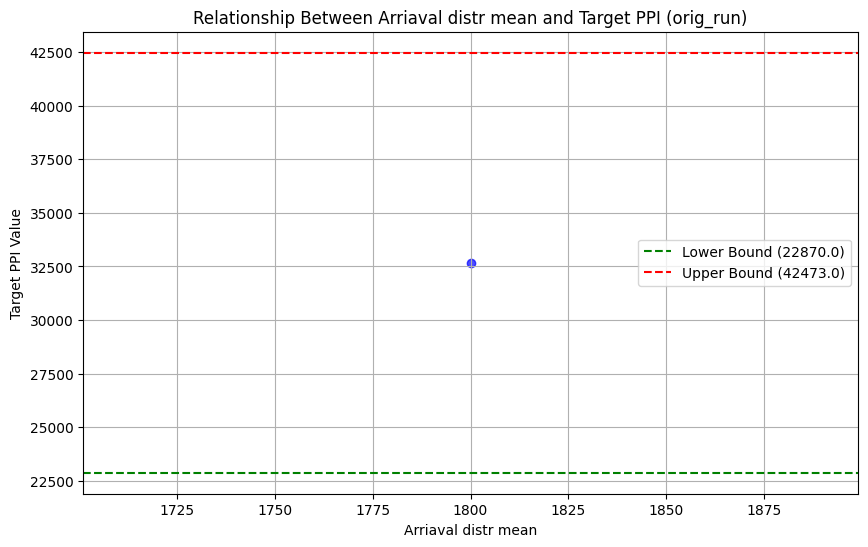

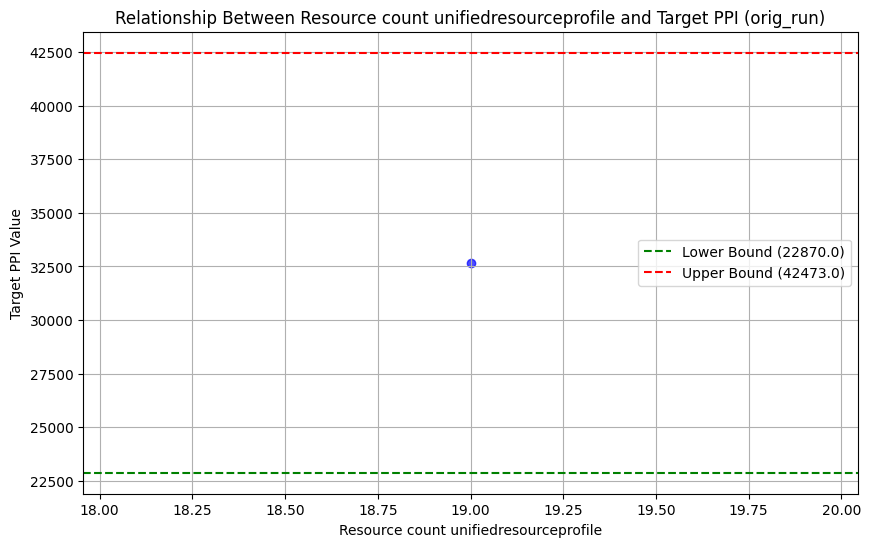


 ### Generating scatter plots for algorithm: grid_search


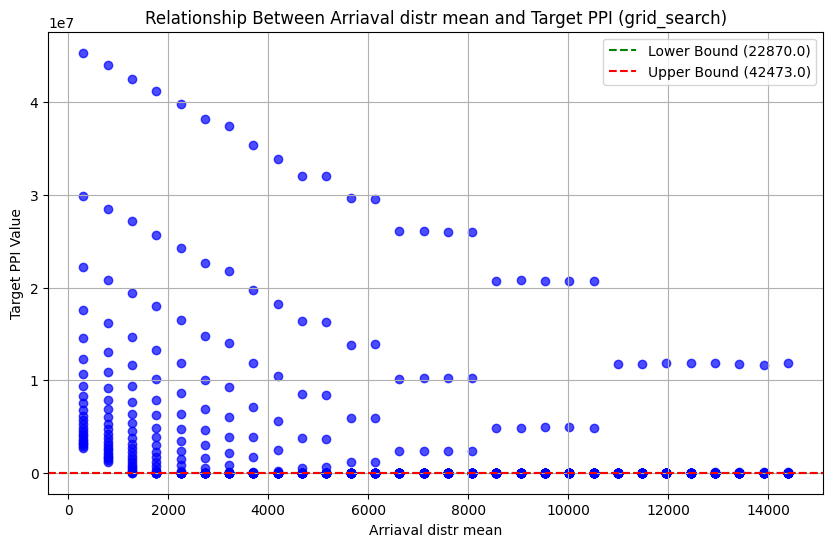

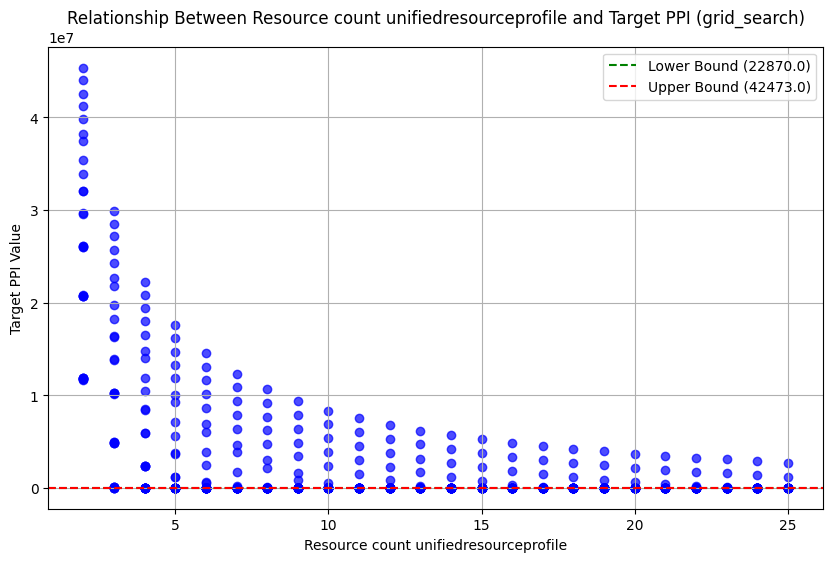


 ### Generating scatter plots for algorithm: quadtree


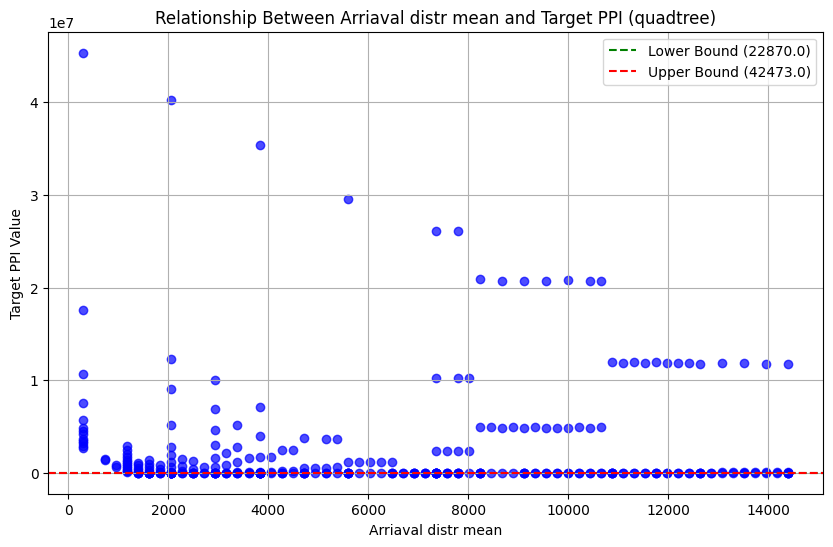

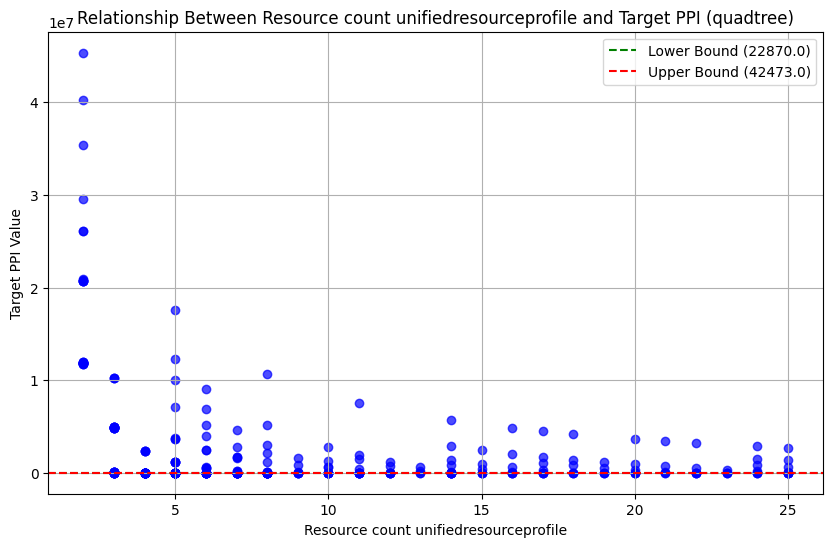

In [134]:
for algorithm in algorithms:
    print(f"\n ### Generating scatter plots for algorithm: {algorithm}") 
    plot_scatter_for_all_parameters(results_df, params, algorithm, target_ppi_col="target_ppi_val", use_log_scale=False)

#### param x param grid

/var/folders/x1/w2d1_9vs4497b2lw430zv8h40000gn/T/ipykernel_14219/1357260561.py:106: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


['orig_run', 'grid_search', 'quadtree']

 ### Generating 3D plot for algorithm: quadtree


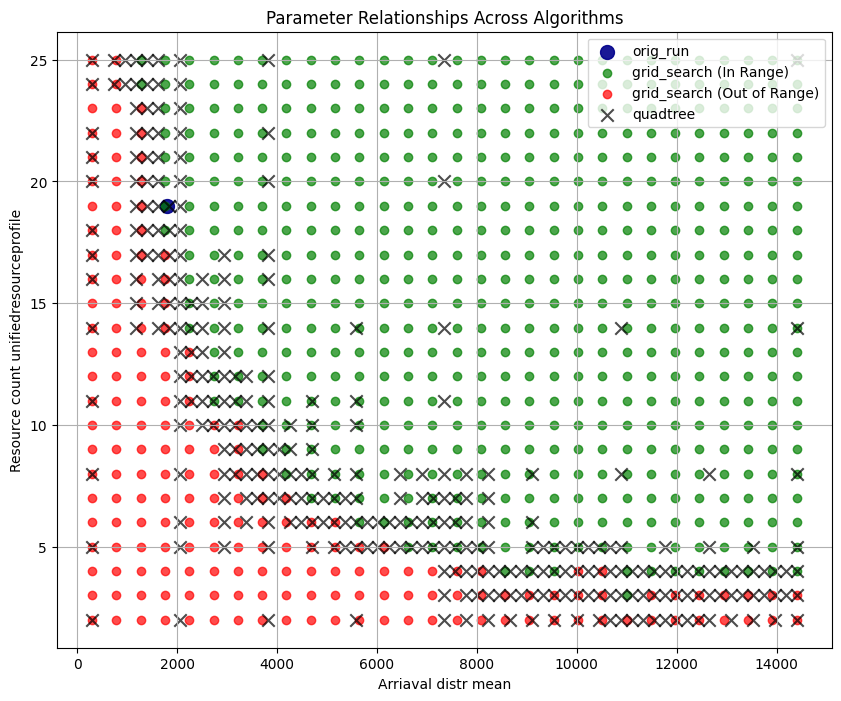

In [141]:

algorithms_list = list(algorithms)
print(algorithms_list)
always_include = ['grid_search', 'orig_run']
algorithms_list = [alg for alg in algorithms if alg not in always_include]
algorithms_list

for algorithm in algorithms_list:

    print(f"\n ### Generating 3D plot for algorithm: {algorithm}")
    # Create a copy of the dataframe
    filtered_df = results_df.copy()

    algorithms_to_plot = always_include.copy()
    algorithms_to_plot.append(algorithm)

    # Filter the dataframe for 'grid_search' and one other algorithm (e.g., 'hill_descent_random_one')
    filtered_df = filtered_df[filtered_df['algorithm'].isin(algorithms_to_plot)]

    target_range = params['target_range']
    plot_param_relationships(filtered_df, params_to_change=params_to_change_keys, algorithms=algorithms, params=params)


### 3D Plots

/var/folders/x1/w2d1_9vs4497b2lw430zv8h40000gn/T/ipykernel_14219/1836813159.py:58: UserWarning: Attempt to set non-positive zlim on a log-scaled axis will be ignored.
  ax.set_zscale('log')
/var/folders/x1/w2d1_9vs4497b2lw430zv8h40000gn/T/ipykernel_14219/1836813159.py:105: UserWarning: Attempt to set non-positive zlim on a log-scaled axis will be ignored.
  ax.set_zlim(bottom=0.0, top=nice_top_tick)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



 ### Generating scatter plots for algorithm: grid_search


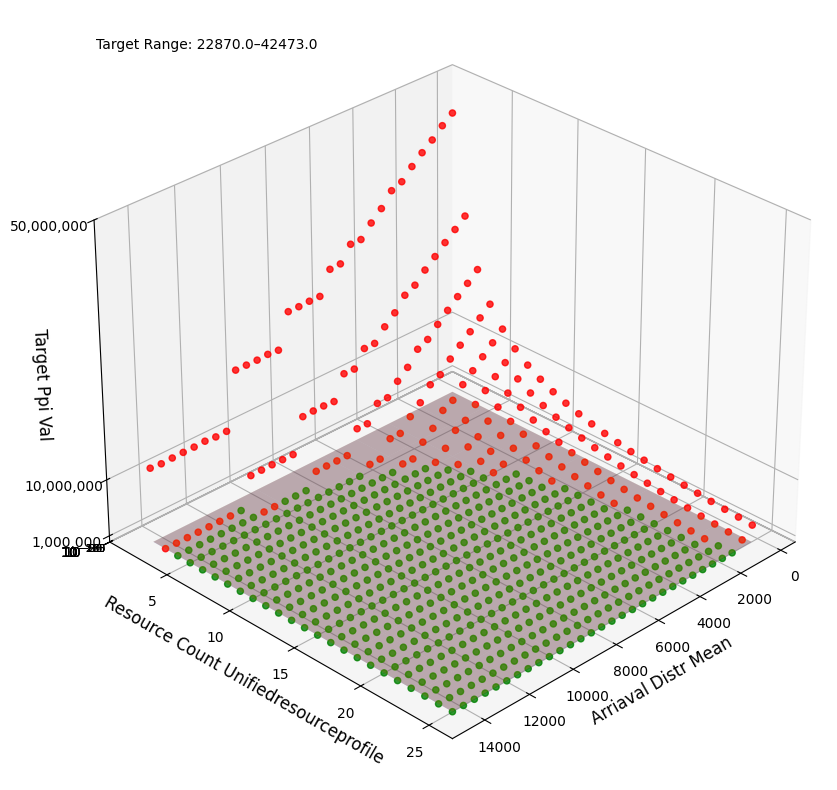

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


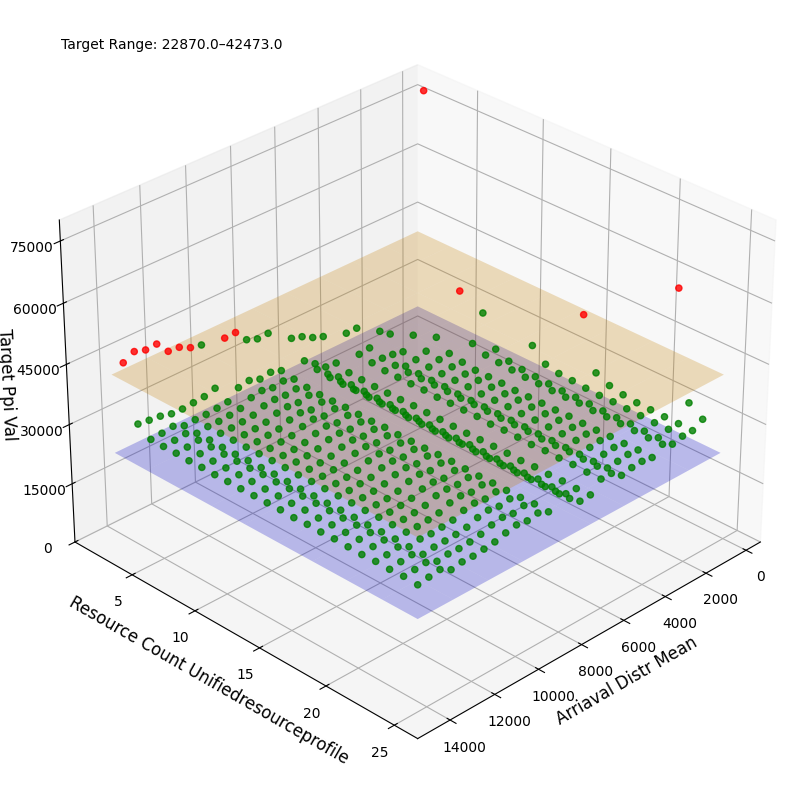

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



 ### Generating scatter plots for algorithm: quadtree


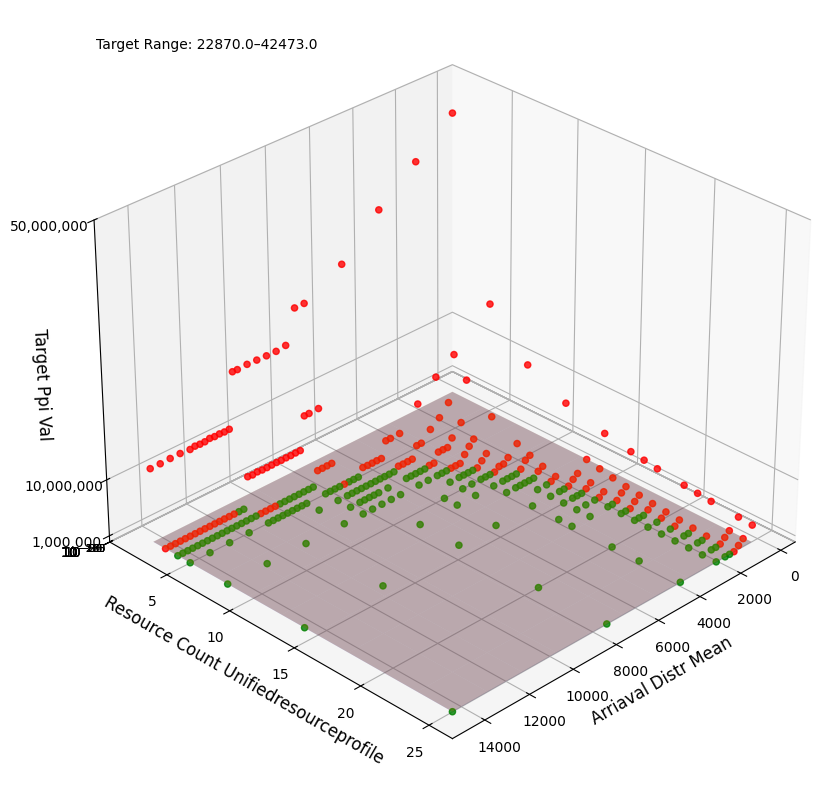

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


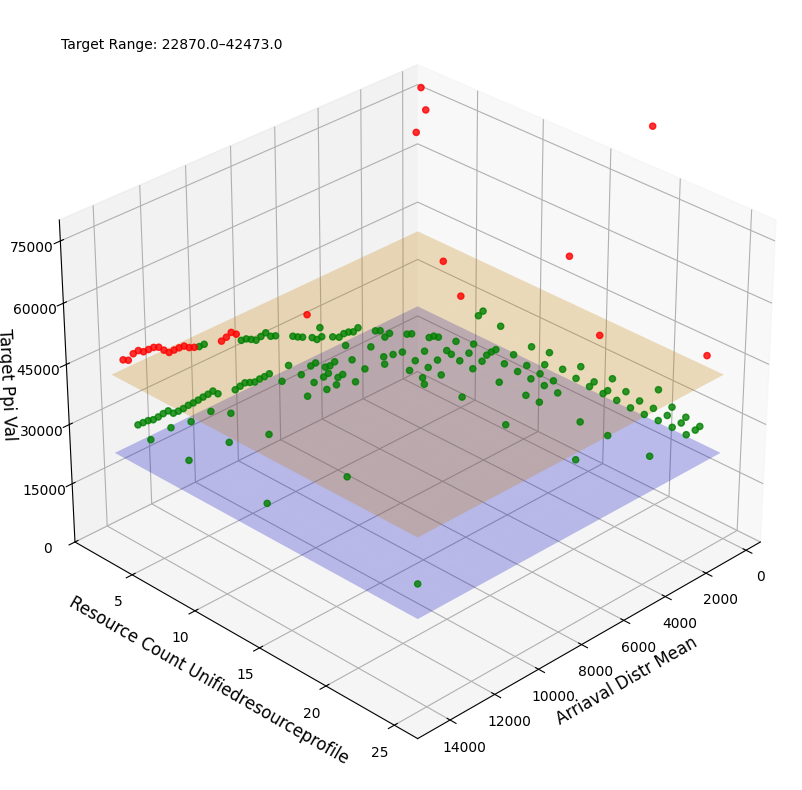

In [128]:
for algorithm in algorithms:
    if algorithm != 'orig_run':
            
        print(f"\n ### Generating scatter plots for algorithm: {algorithm}") 

        # Define the columns for the axes
        x_col = "arriaval_distr_mean"
        z_col = results_df.columns[-1] 
        y_col = "target_ppi_val"

        # Call the function to plot the 3D graph
        
        plot_3d_results_with_target_range(results_df, algorithm,  x_col, z_col, y_col, params['target_range'], use_log_scale=True, draw_plane=False)
        plot_3d_results_with_target_range(results_df, algorithm,  x_col, z_col, y_col, params['target_range'], use_log_scale=False, draw_plane=False, y_max_value=80000)
        # plot_3d_results_with_target_range(results_df, algorithm, x_col, z_col, y_col, params['target_range'], use_log_scale=False, draw_plane=False)

In [79]:
results_df

,algorithm,simulation_id,timestamp,target_range,status,target_ppi,target_ppi_val,target_ppi_list,arriaval_distr_mean,resource_count_UnifiedResourceProfile
0,orig_run,0,2025-10-27T21:29:41.079104Z,"[22870.0, 42473.0]",in,cycle_time,3.267173e+04,"[32379.47947947948, 33200.3003003003, 32792.48...",1800.0000,19
1,grid_search,1,2025-10-27T21:29:54.823325Z,"[22870.0, 42473.0]",out,cycle_time,4.535717e+07,"[45292426.6, 45420430.3, 44875584.0, 45547285....",300.0000,2
2,grid_search,2,2025-10-27T21:30:08.279304Z,"[22870.0, 42473.0]",out,cycle_time,2.994241e+07,"[30144529.2, 30008499.9, 29984179.8, 29913653....",300.0000,3
3,grid_search,3,2025-10-27T21:30:21.771201Z,"[22870.0, 42473.0]",out,cycle_time,2.226348e+07,"[22150672.1, 22285285.7, 22276860.0, 22120845....",300.0000,4
4,grid_search,4,2025-10-27T21:30:35.310572Z,"[22870.0, 42473.0]",out,cycle_time,1.760814e+07,"[17609700.9, 17659087.0, 17730293.3, 17508599....",300.0000,5
...,...,...,...,...,...,...,...,...,...,...
1033,quadtree,1033,2025-10-28T00:45:08.649523Z,"[22870.0, 42473.0]",in,cycle_time,3.403482e+04,"[34458.19109342916, 34861.20756172839, 34117.0...",1401.5625,23
1034,quadtree,1034,2025-10-28T00:45:19.674930Z,"[22870.0, 42473.0]",in,cycle_time,3.318244e+04,"[32525.287871033775, 33386.25543200409, 33281....",1401.5625,24
1035,quadtree,1035,2025-10-28T00:45:30.610260Z,"[22870.0, 42473.0]",out,cycle_time,8.210073e+05,"[827551.5046875, 816032.134375, 806116.9090965...",960.9375,24
1036,quadtree,1036,2025-10-28T00:45:41.769694Z,"[22870.0, 42473.0]",out,cycle_time,6.552244e+05,"[634358.3984375, 633836.4254879879, 678046.440...",960.9375,25
